In this notebook, we will create a network of all deputies over the years and analyze the patterns obtained

In [5]:
!pip install nxviz
!pip install unidecode

In [0]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Building the graph
import requests
from sklearn.feature_extraction.text import CountVectorizer
from itertools import combinations 
import networkx as nx
from nxviz import CircosPlot

from unidecode import unidecode

In [0]:
years = {
    "2019": None,
    "2018": None,
    "2017": None,
    "2016": None,
    "2015": None,
    "2014": None,
    "2013": None,
    "2012": None,
    "2011": None,
    "2010": None,
    "2009": None,
    "2008": None,
    "2007": None,
    "2006": None,
    "2005": None,
    "2004": None,
    "2003": None
}

In [0]:
for year in years: 
  dataset = pd.read_csv('speeches'+str(year)+'.csv', sep=';', index_col=0)
  dataset.loc[:, 'speech'] = dataset.speech.str.replace('\r', '')
  dataset.loc[:, 'speech'] = dataset.speech.str.replace('\t', '')
  dataset.loc[:, 'speech'] = dataset.speech.str.replace('\n', '')
  dataset.loc[:, 'speech'] = dataset.speech.str.replace('-', '')
  years[year] = dataset

In [0]:
def is_important(word):
  if len(word) < 2:
    return False
  ends = ['indo', 'ando', 'ondo', 'r', 'em',
         'amos', 'imos', 'ente', 'emos','ou','dei',
         'iam', 'cido', 'mos', 'am']
  for end in ends:
    if word.endswith(end):
      return False
    
  return True
  
  
def norm(word):
  exceptions = ['pais', 'pessoas', 'dados', 'companhias', 'juntos']
  if word in exceptions:
    return word
  
  ends = ['es', 'as']
  for end in ends:
    if word.endswith(end):
      return word[:-2]
    
  if word.endswith('is'):
    return word[:-2] + 'l'
    
  if word.endswith('s'):
    return word[:-1]
  
  return word

In [0]:
def generate_graph(vocabulary):
  """
  """
  
  # Create a undirected graph
  G = nx.Graph()
  
  # Iterate over each item of the vocabulary
  for phrase, frequency in vocabulary.items():
    # Get words in the phrase
    words = phrase.split()
    
    # Using only tokens of length 2 or 5
    if len(words) not in [2,5]:
      continue
    
    words_norm = [norm(word) for word in words if is_important(word) ]
    # Extract unique words in the phrase
    words_unique = list(set(words_norm))
    
    # Create a node if it does not exists already
    G.add_nodes_from(words_unique)
    
    # Form combinations of 2 from the words
    # which will be a edge
    pair = combinations(words_unique, 2) 
    
    for word1, word2 in pair:
      edge = (word1, word2)
      # Increments weight of edge
      # if it already exists
      # Otherwise, create a new edge
      if edge in G.edges:
        G.edges[word1, word2]['weight'] += frequency
      else:
        G.add_weighted_edges_from([(word1, word2, frequency)])

  return G

## PT

Analysis over the years (2003-2019) of PT

In [0]:
stop_words_pt = requests.get('https://gist.githubusercontent.com/alopes/5358189/'+
                             'raw/2107d809cca6b83ce3d8e04dbd9463283025284f/stopwords.txt')

In [0]:
TOKENS_ALPHANUMERIC = '[A-Za-z]+(?=\\s+)'
# Ignore irrelevant words
STOP_WORDS = [unidecode(word.strip()) for word in stop_words_pt.text.split('\n')]
STOP_WORDS += ['neste', 'nesta', 'aqui', 'vou', 'nele', 'mesma', 'faz',
              'zero', 'dois', 'duas', 'ir', 'mil', 'vai', 'aa', 'porque', 'pois',
              'gostaria', 'cumprimentar', 'quero', 'dizer', 'vez', 'sobre', 'cada',
              'deste', 'desta', 'ainda', 'vamos', 'pode', 'vem', 'deixar', 'vao',
              'fazer', 'sendo', 'todo', 'todos', 'grande', 'presidente', 'quer',
              'qualquer', 'dia', 'deputado', 'deputados', 'deputadas', 'venho',
              'ver', 'tudo', 'tao', 'querem', 'correnco', 'corresponda', 'forma',
              'fez', 'dar', 'apenas', 'traz', 'varios', 'vim', 'alem', 'sido',
              'demos', 'todas', 'dermos', 'vemos', 'vale', 'torno', 'faco', 'espera',
              'expressar', 'tentamos', 'pegar', 'queremos', 'usaremos', 'senhores',
               'senhoras', 'senhor', 'senhora', 'fazendo', 'veio', 'vi', 'durante',
              'ali', 'aqui', 'queria', 'ouvi', 'falando', 'entao', 'parece', 'assistam',
              'presenciei', 'falar', 'algumas', 'sei', 'usar', 'fiz', 'usei', 'quiser',
              'garantir', 'devida', 'contemplar', 'adianta', 'pensarmos', 'alguns',
              'muitas', 'muitos', 'implica', 'fizeram', 'frisar', 'diz', 'poucas',
              'usam', 'acho', 'combinamos', 'reiteradamente', 'deferido', 'outro',
              'precisamos', 'importante', 'interessante', 'amplie', 'elencar',
              'trago', 'outros', 'outras', 'outra', 'parte', 'encaminhado', 'integra',
              'vezes', 'seis', 'partir', 'cria', 'atraves', 'anos', 'meses', 'oitava',
              'chegou', 'posso', 'referente', 'detinado', 'nenhuma', 'nenhum', 'iv',
              'doze', 'medias', 'ultimos', 'esquece', 'colocar', 'unica', 'ano', 
              'aplicando', 'fica', 'fale', 'concedo', 'fala', 'passaram', 'comum', 
              'menos', 'mais', 'jamais','sempre', 'querendo', 'ai', 'mexe', 'alguma',
              'saber', 'der', 'peco', 'cuide', 'peco', 'estar', 'trazer', 'sabe',
               'tirou', 'cumprimento', 'passam', 'facamos', 'fazem', 'quatro',
              'muita', 'certeza', 'la', 'quase', 'disse', 'maior', 'feito', 'deve',
              'inspecionados', 'inicio', 'citando', 'poder', 'ficar', 'aplicase',
              'inicialmente', 'solicito', 'dessa', 'precisa', 'cabe', 'possui',
              'terceiro', 'mencionou', 'altura', 'podiam', 'certa', 'bem', 'toda',
              'exija', 'trata', 'coisa', 'simples', 'criaram', 'medida', 'momento',
              'tentando', 'agradeco', 'pronunciamento', 'inventaram', 'votarmos',
              'votar', 'votaram', 'votamos', 'sustarmos', 'criou', 'falei', 'preciso',
              'convencam', 'atingiu', 'volta', 'questao', 'chegar', 'destacar', 
               'causou','prezadas', 'prezados', 'desculpemm', 'encerramento',
               'prezado','parece' 'confirmando','excelentissimo', 'escutado',
               'orientando','correndo','haver','respeitassem','ora','reconhecemos',
               'cumprimentando','informar','orientar','suprimir','profunda',
                'destacar','considera','comeca','focar', 'quiserem','encaminhamento', 
              'dentro', 'obrigar', 'discutida', 'reais', 'gastamse', 'tanta', 
              'tanto', 'tantas', 'tantos', 'ajudar', 'avanca','messes',
              'dispensado', 'chegar', 'previsto', 'preciso', 'convencam', 'duvida',
              'agora', 'tomam','tirar', 'unico', 'faca', 'primeiro', 'podemos',
              'contra', 'acabar', 'coloca', 'algo', 'uns', 'carregam', 'surgiu', 
               'rever', 'retiralo', 'ressalto', 'importancia', 'aproveito', 
               'oportunidade', 'comungo', 'significa', 'parabenizar','hoje',
              'conheca', 'invertendo', 'confirmando', 'desenvolveu', 'aprofundar',
              'conduz', 'desculpeme', 'excelentissimos', 'roda', 'descaracteriza',
               'concedem', 'cresca', 'favoravelmente', 'instalamos', 'autorize',
              'determina', 'assim', 'dias', 'onde', 'quando', 'tira', 'pensar',
              'implicara', 'horas', 'acredito', 'ninguem', 'procuraria', 'acima',
              'deverao', 'falo', 'nada', 'fundamental', 'totalmente', 'nessa',
              'fazermos', 'pensar', 'ganhar', 'comete', 'sofre', 'nesse', 'neste',
              'existe', 'fere', 'passou', 'tres', 'obstruindo', 'rediscutir',
               'assunto', 'assuntos', 'entendo', 'preservar', 'tarde', 'meios',
              'desse', 'simplesmente','antes', 'longe', 'perto','aproximadamente',
              'mal', 'melhor', 'pior', 'falamos', 'bastasse', 'mostrar', 'meio',
              'alguem', 'inclusive', 'colega', 'boa', 'bom', 'nobre', 'primeira',
              'primeiro', 'milhoes', 'deputada', 'deputadas', 'ficaria', 'estara',
              'desses', 'dessas', 'junto', 'fim', 'semana', 'orientamos', 'claro',
              'claros', 'orienta','pouco', 'colegas']
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,decode_error='replace' ,
                                   stop_words=STOP_WORDS, ngram_range=(2,5),
                                   encoding='latin1', strip_accents='unicode')

2019
['governo']
['governo', 'brasil', 'estado', 'povo', 'pais', 'reforma', 'trabalhador', 'direito', 'previdencia', 'luta', 'defesa', 'proposta', 'ministro', 'politica', 'educacao', 'federal', 'projeto', 'desenvolvimento', 'social', 'discurso', 'populacao', 'saude', 'pessoas', 'programa', 'nacional', 'historia']


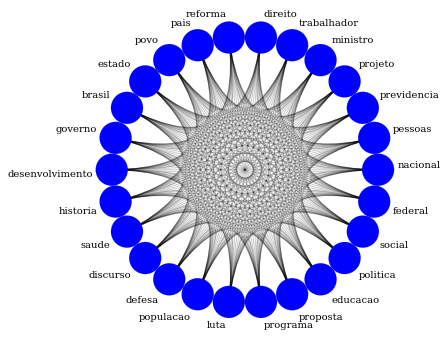

2018
['governo']
['governo', 'estado', 'povo', 'rio', 'brasil', 'direito', 'pais', 'processo', 'pessoas', 'trabalhador', 'lula', 'brasileiro', 'golpe', 'tempo', 'reforma', 'janeiro', 'populacao']


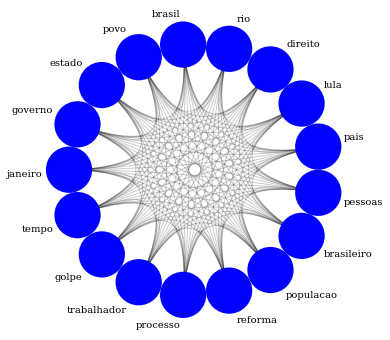

2017
['governo']
['governo', 'estado', 'direito', 'povo', 'reforma', 'trabalhador', 'brasil', 'projeto', 'relacao', 'pais', 'municipio', 'federal', 'social', 'programa', 'politica', 'trabalho', 'previdencia', 'nacional', 'sociedade', 'publico']


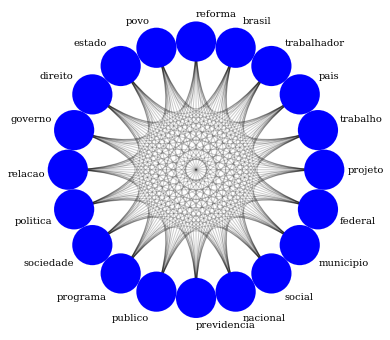

2016
['governo']
['governo', 'brasil', 'estado', 'projeto', 'presidenta', 'direito', 'pais', 'povo', 'programa', 'golpe', 'brasileiro', 'social', 'politico', 'processo', 'oposicao', 'brasileira', 'defesa', 'populacao', 'movimento', 'nacional', 'dilma', 'fato', 'lula']


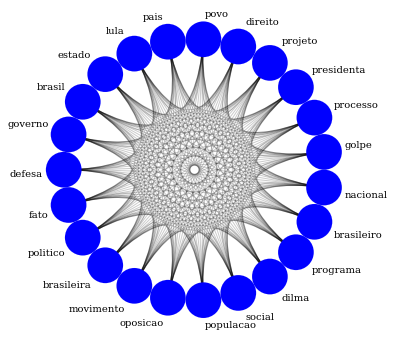

2015
['governo']
['governo', 'estado', 'brasil', 'pais', 'federal', 'direito', 'projeto', 'condico', 'pessoas', 'acesso', 'nacional', 'novo', 'povo', 'populacao', 'presidenta', 'reforma', 'social', 'sociedade', 'politic', 'defesa', 'mulher', 'desenvolvimento', 'municipio', 'agricultura', 'educacao', 'movimento', 'trabalhador']


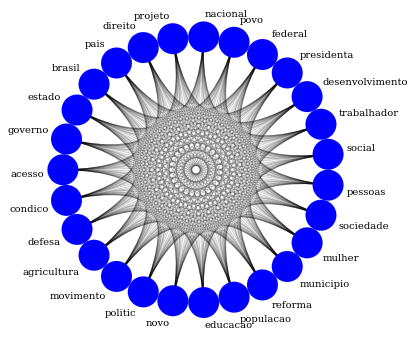

2014
['governo']
['governo', 'estado', 'brasil', 'publica', 'nacional', 'projeto', 'politica', 'federal', 'social', 'direito', 'recurso', 'trabalho', 'presidenta', 'povo', 'casa', 'dilma', 'pessoas', 'trabalhador', 'quanto', 'populacao', 'regiao', 'educacao', 'construcao', 'exemplo', 'programa', 'municipio', 'relacao', 'servico', 'investimento', 'cidade', 'publico', 'desenvolvimento', 'sociedade']


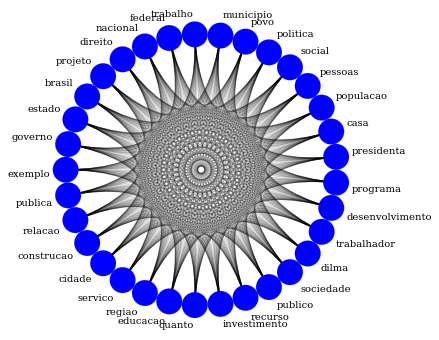

2013
['governo']
['governo', 'estado', 'brasil', 'pais', 'projeto', 'mundo', 'nacional', 'politica', 'trabalho', 'brasileiro', 'dilma', 'programa', 'presidenta', 'desenvolvimento', 'pessoas', 'trabalhador', 'politic', 'populacao', 'direito', 'social', 'plano', 'condico', 'investimento', 'aco', 'combate', 'acesso', 'casa', 'sistema', 'reforma', 'segundo', 'seguranca', 'desde', 'sociedade', 'educacao']


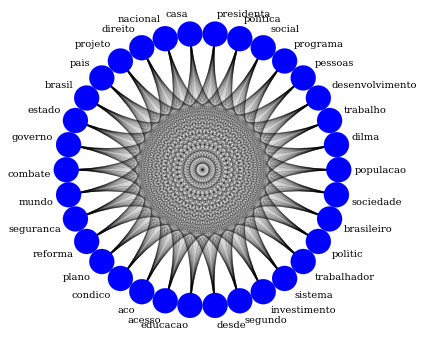

2012
['estado']
['estado', 'governo', 'brasil', 'pais', 'projeto', 'trabalho', 'area', 'desenvolvimento', 'federal', 'politica', 'educacao', 'publico', 'novo', 'lei', 'direito', 'brasileiro', 'populacao', 'pessoas', 'vida', 'social', 'dilma', 'povo', 'reforma', 'politic', 'quanto', 'saude', 'recurso', 'nova', 'gestao', 'seguranca', 'programa', 'justica', 'segundo']


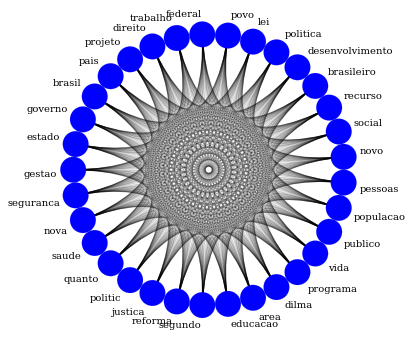

2011
['estado']
['estado', 'governo', 'brasil', 'pais', 'projeto', 'politica', 'desenvolvimento', 'social', 'programa', 'nacional', 'trabalho', 'casa', 'populacao', 'educacao', 'pessoas', 'dilma', 'vida', 'bilho', 'sistema', 'federal', 'condico', 'area', 'relacao', 'municipio', 'publico', 'recurso', 'seguranca', 'ministerio', 'brasileiro', 'novo', 'construcao', 'servico', 'saude', 'investimento', 'qualidade', 'cidade']


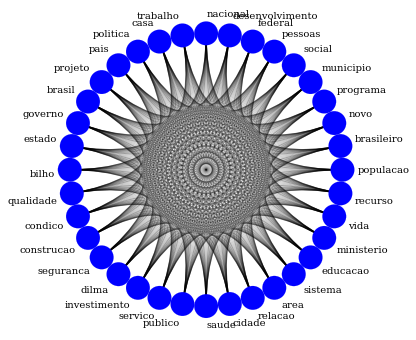

2010
['governo']
['governo', 'estado', 'pais', 'brasil', 'projeto', 'nacional', 'brasileiro', 'social', 'politica', 'trabalho', 'povo', 'lula', 'programa', 'politic', 'populacao', 'desenvolvimento', 'direito', 'federal', 'vida', 'respeito', 'desde', 'novo', 'aco', 'sociedade', 'processo', 'debate', 'papel', 'condico', 'base', 'partido', 'municipio', 'participacao', 'recurso', 'acesso']


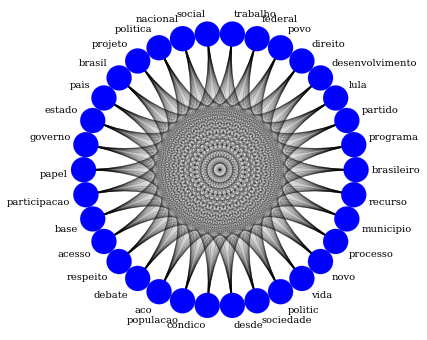

2009
['governo']
['governo', 'estado', 'brasil', 'pais', 'desenvolvimento', 'trabalho', 'educacao', 'social', 'projeto', 'programa', 'politica', 'politic', 'nacional', 'federal', 'publico', 'processo', 'condico', 'investimento', 'lula', 'luta', 'populacao', 'direito', 'servico', 'povo', 'trabalhador', 'novo', 'sociedade', 'qualidade', 'pessoas']


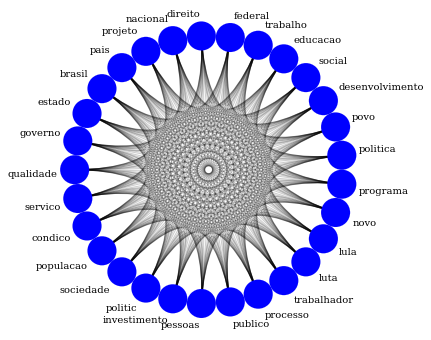

2008
['governo']
['governo', 'estado', 'federal', 'brasil', 'municipio', 'recurso', 'nacional', 'projeto', 'desenvolvimento', 'trabalho', 'programa', 'social', 'investimento', 'relacao', 'educacao', 'publico', 'reforma', 'area', 'servico', 'politic', 'ministerio', 'program', 'construcao', 'participacao', 'conjunto', 'public', 'plano', 'empres']


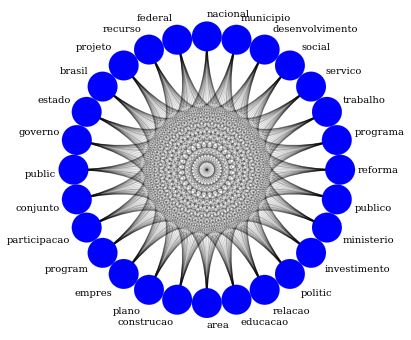

2007
['estado']
['estado', 'governo', 'pais', 'brasil', 'projeto', 'nacional', 'politica', 'desenvolvimento', 'federal', 'trabalho', 'social', 'recurso', 'educacao', 'casa', 'lei', 'lula', 'vida', 'brasileiro', 'sociedade', 'reforma', 'programa', 'publica', 'politic', 'relacao', 'partido', 'povo', 'debate', 'compromisso', 'participacao', 'qualidade', 'investimento', 'direito', 'exemplo', 'objetivo', 'segundo']


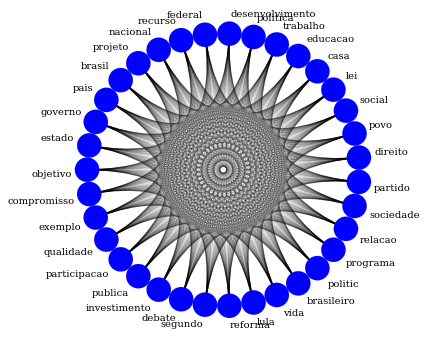

2006
['governo']
['governo', 'estado', 'lula', 'pais', 'brasil', 'projeto', 'politica', 'nacional', 'trabalho', 'educacao', 'desenvolvimento', 'federal', 'condico', 'social', 'programa', 'brasileiro', 'povo', 'politic', 'publico', 'populacao', 'processo', 'casa', 'participacao', 'apoio', 'acesso', 'sociedade', 'public', 'area', 'brasileira', 'direito']


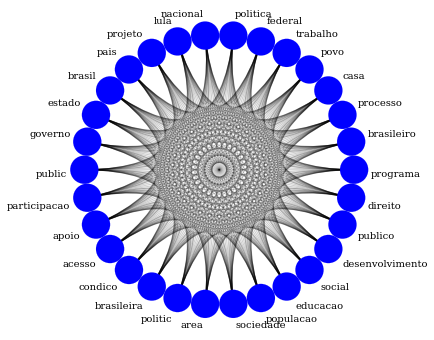

2005
['governo']
['governo', 'estado', 'pais', 'compromisso', 'brasil', 'social', 'desenvolvimento', 'nacional', 'trabalho', 'projeto', 'direito', 'lula', 'trabalhador', 'casa', 'partido', 'brasileiro', 'federal', 'relacao', 'ministerio', 'reforma', 'educacao', 'sociedade', 'aco', 'quanto', 'recurso', 'fato', 'tempo', 'programa', 'lei', 'processo', 'area', 'vida', 'politic', 'apoio', 'pessoas', 'acesso', 'servico', 'desde']


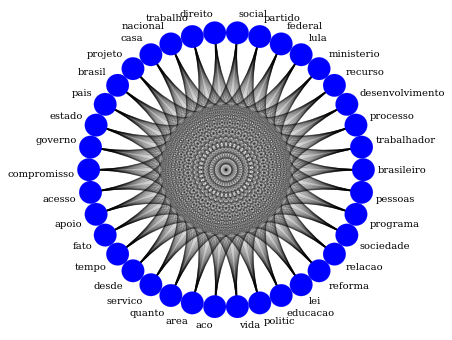

2004
['governo']
['governo', 'program', 'desenvolvimento', 'social', 'recurso', 'programa', 'projeto', 'nacional', 'municipio', 'brasil', 'aco', 'trabalho', 'pais', 'area', 'politic', 'saude', 'brasileiro', 'direito', 'sociedade', 'lula', 'vida', 'tal', 'populacao', 'condico', 'desde', 'federal']


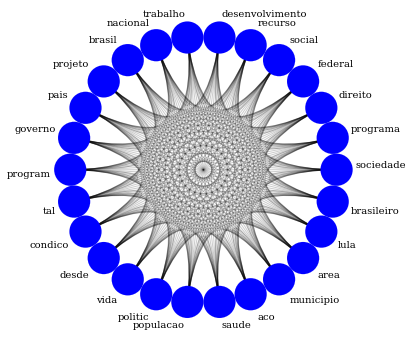

2003
['governo']
['governo', 'estado', 'proposta', 'recurso', 'brasil', 'social', 'novo', 'ministerio', 'desenvolvimento', 'lula', 'realidade', 'construcao', 'processo', 'federal', 'compromisso']


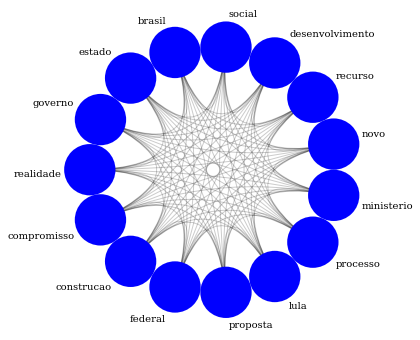

In [14]:
for year in years: 
  print(year)
  # Fit to the data
  X = vec_alphanumeric.fit_transform(years[year].query('party == "PT"').speech)

  # Creating the graph
  G = generate_graph(vec_alphanumeric.vocabulary_)

  # Compute the degree centralities of G
  deg_cent = nx.degree_centrality(G)

  # Compute the maximum degree centrality
  max_dc = max(deg_cent.values())

  prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

  # Print the most prolific collaborator(s)
  print(prolific_collaborators)

  cliques = nx.find_cliques(G)

  largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

  print(largest_clique)

  G_lc = G.subgraph(largest_clique)

  for n in G_lc.nodes():
      G_lc.node[n]['degree centrality'] = deg_cent[n]

  # Create the CircosPlot object
  c = CircosPlot(G_lc, node_labels=True, node_grouping='degree centrality',
                node_order='degree centrality')

  # Draw the CircosPlot to the screen
  c.draw()
  plt.show()

## PDT

Analysis over the years (2003-2019) of PDT

2019
['estado']
['debate', 'casa', 'reforma', 'previdencia', 'governo', 'brasil', 'pais', 'povo', 'projeto', 'relacao']


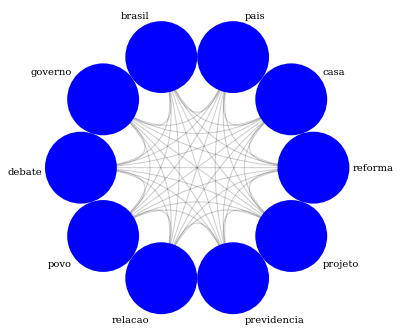

2018
['brasil']
['brasil', 'estado', 'rio', 'processo', 'regiao', 'desenvolvimento', 'pais', 'brasileiro', 'povo']


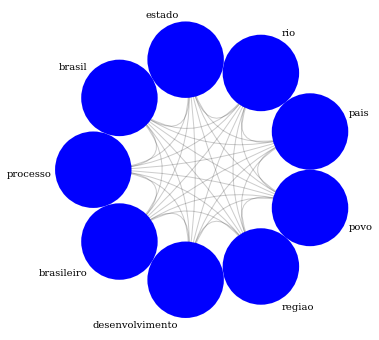

2017
['governo']
['governo', 'ministro', 'congresso', 'povo', 'pais', 'crise', 'carlo', 'casa']


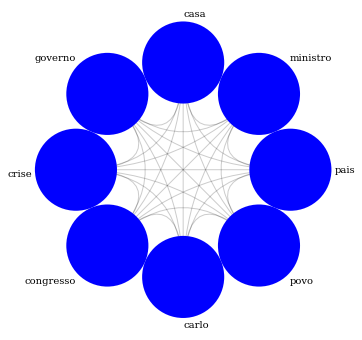

2016
['governo']
['governo', 'estado', 'federal', 'idade', 'alfabetizacao', 'programa', 'nacional', 'adotado']


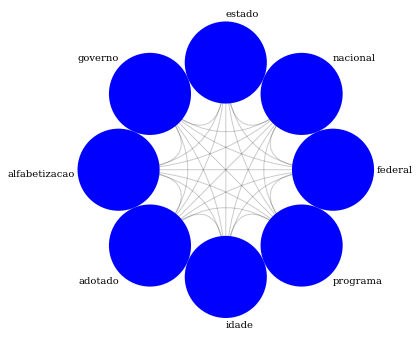

2015
['estado']
['estado', 'sistema', 'saude', 'publica', 'seguranca', 'brasil', 'pais', 'vida', 'nacional', 'brasileiro', 'politica', 'povo', 'sociedade']


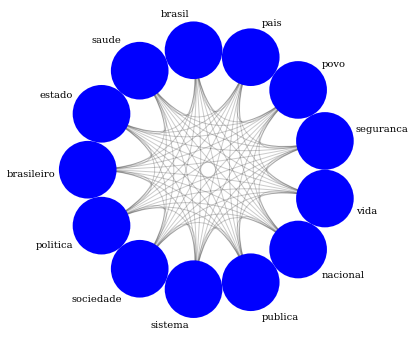

2014
['estado']
['estado', 'governo', 'federal', 'educacao', 'nacional', 'brasil', 'municipio', 'brasileiro', 'projeto', 'politica', 'saude', 'desde', 'comissao']


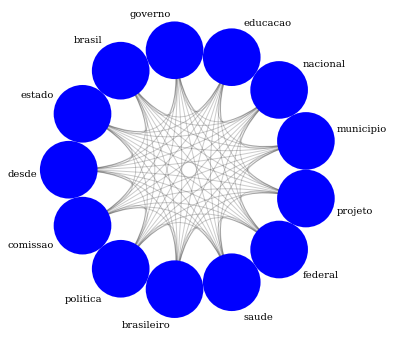

2013
['brasil']
['brasil', 'governo', 'estado', 'federal', 'rio', 'regiao', 'relacao', 'nordeste', 'seca']


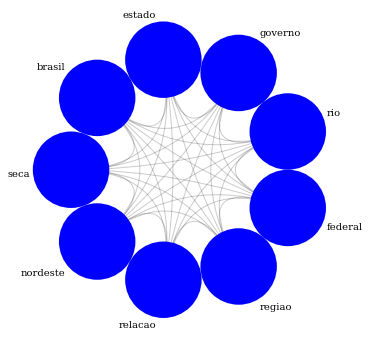

2012
['estado']
['estado', 'brasil', 'publico', 'ministerio', 'orgao', 'populacao', 'governo', 'saude', 'seguranca', 'condico']


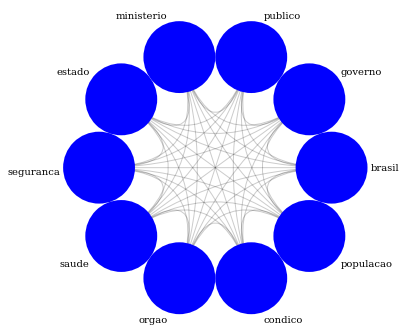

2011
['estado']
['estado', 'brasil', 'saude', 'casa', 'governo', 'pais', 'povo', 'projeto', 'brasileiro', 'direito']


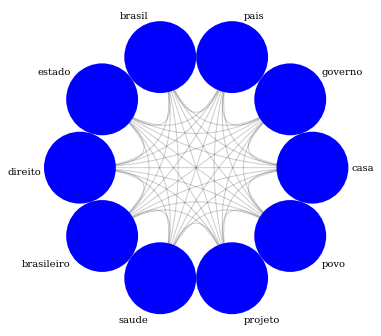

2010
['estado']
['social', 'pais', 'saude', 'projeto', 'casa', 'direito', 'camara', 'comissao']


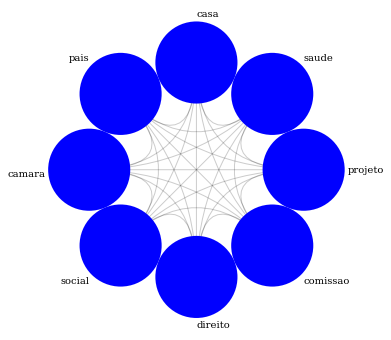

2009
['estado']
['estado', 'governo', 'projeto', 'casa', 'quanto', 'comissao', 'recurso', 'orcamento', 'emenda']


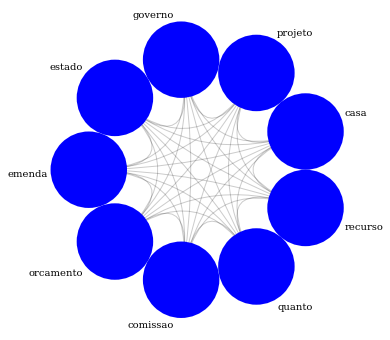

2008
['estado']
['social', 'pais', 'desenvolvimento', 'deu', 'projeto', 'municipio', 'regiao', 'recurso', 'populacao']


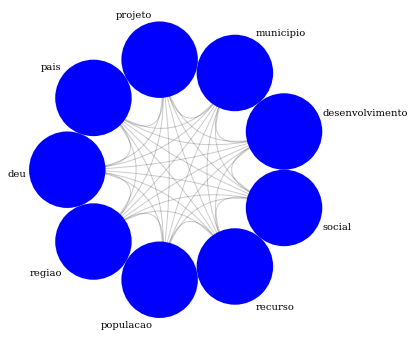

2007
['estado']
['estado', 'governo', 'projeto', 'desenvolvimento', 'educacao', 'municipio', 'aco', 'social', 'demal', 'lei', 'politic']


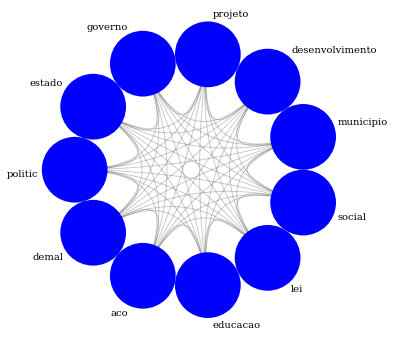

2006
['governo']
['marquezelli', 'nelson', 'pagamento', 'parcela', 'severiano', 'alv', 'oliveira', 'expressao', 'inocencio']


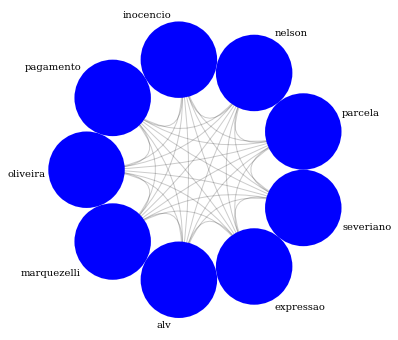

2005
['governo']
['governo', 'estado', 'pais', 'povo', 'partido', 'politica', 'politico', 'brizola', 'grand', 'nunca', 'base']


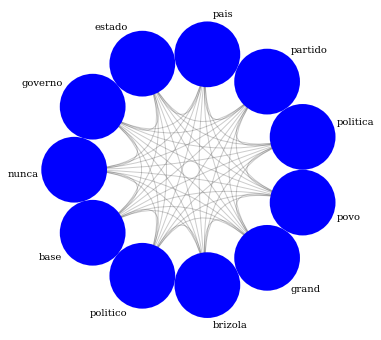

2004
['governo']
['governo', 'congresso', 'lula', 'debate', 'projeto', 'plano', 'comissao', 'ppa']


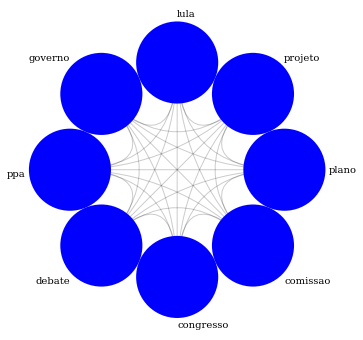

2003
['estado']
['instituido', 'fundo', 'educacao', 'ensino', 'manutencao', 'magisterio', 'valorizacao', 'constitucional', 'desenvolvimento']


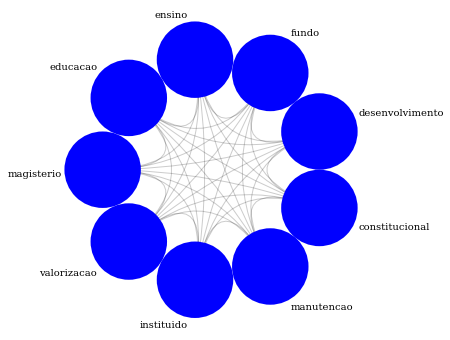

In [15]:
for year in years: 
  print(year)
  # Fit to the data
  X = vec_alphanumeric.fit_transform(years[year].query('party == "PDT"').speech)

  # Creating the graph
  G = generate_graph(vec_alphanumeric.vocabulary_)

  # Compute the degree centralities of G
  deg_cent = nx.degree_centrality(G)

  # Compute the maximum degree centrality
  max_dc = max(deg_cent.values())

  prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

  # Print the most prolific collaborator(s)
  print(prolific_collaborators)

  cliques = nx.find_cliques(G)

  largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

  print(largest_clique)

  G_lc = G.subgraph(largest_clique)

  for n in G_lc.nodes():
      G_lc.node[n]['degree centrality'] = deg_cent[n]

  # Create the CircosPlot object
  c = CircosPlot(G_lc, node_labels=True, node_grouping='degree centrality',
                node_order='degree centrality')

  # Draw the CircosPlot to the screen
  c.draw()
  plt.show()

## DEM

Analysis over the years (2003-2019) of DEM (before it was called PFL)

2019
['estado']
['estado', 'brasil', 'trabalho', 'projeto', 'governo', 'ministro', 'casa', 'reforma', 'povo', 'camara', 'novo']


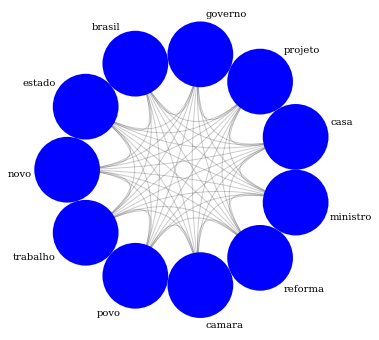

2018
['estado']
['estado', 'nacional', 'projeto', 'governo', 'recurso', 'brasil', 'municipio', 'federal', 'brasileiro', 'povo', 'seguranca', 'relacao']


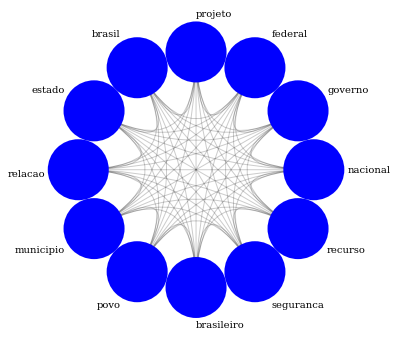

2017
['estado']
['estado', 'brasil', 'governo', 'quanto', 'educacao', 'direito', 'brasileiro', 'caso', 'saude', 'sistema', 'nacional']


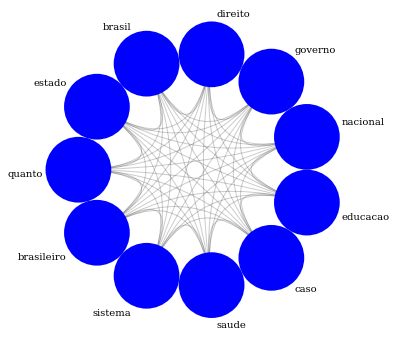

2016
['governo']
['governo', 'pais', 'saude', 'estado', 'recurso', 'projeto', 'situacao', 'povo', 'brasileiro', 'milhar', 'bilho', 'federal']


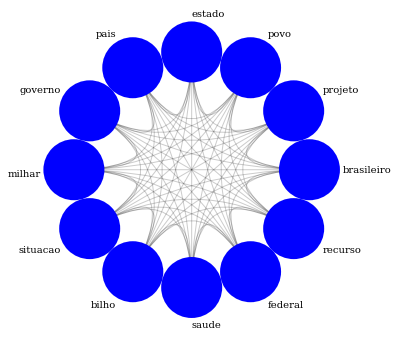

2015
['governo']
['governo', 'federal', 'estado', 'pais', 'servico', 'saude', 'populacao', 'publica', 'situacao', 'municipio', 'projeto', 'nacional']


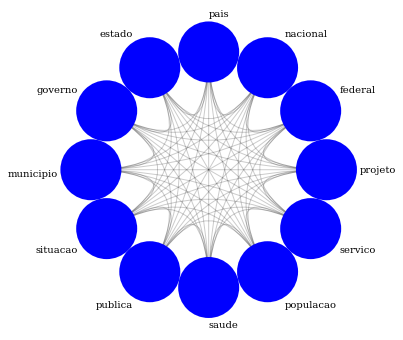

2014
['brasil']
['brasil', 'governo', 'estado', 'pais', 'saude', 'casa', 'publica', 'nacional', 'trabalho', 'direito', 'quanto', 'brasileiro', 'sistema', 'educacao']


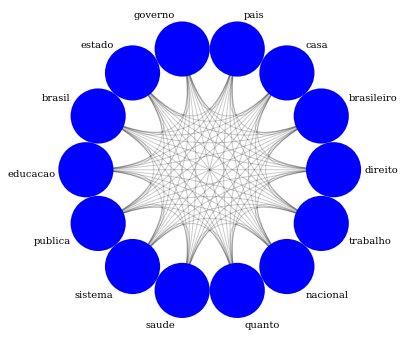

2013
['governo']
['governo', 'pais', 'brasil', 'estado', 'educacao', 'ministerio', 'brasileiro', 'povo', 'nacional', 'bilho', 'programa']


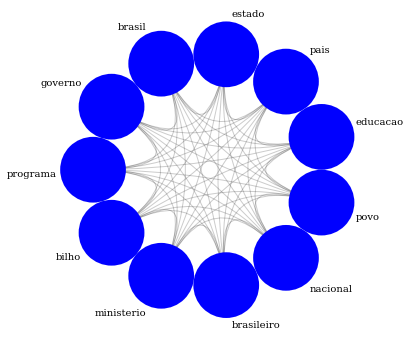

2012
['governo']
['governo', 'estado', 'pais', 'brasil', 'recurso', 'ministerio', 'seguranca', 'publica', 'saude', 'area', 'brasileiro', 'nacional']


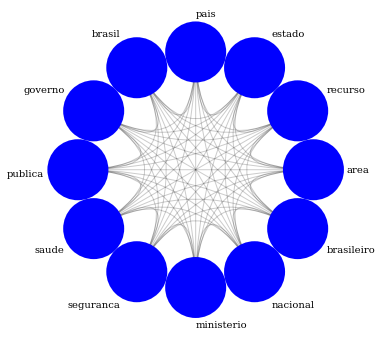

2011
['governo']
['governo', 'estado', 'brasil', 'pais', 'projeto', 'educacao', 'recurso', 'trabalho', 'falta', 'area', 'seguranca', 'lei']


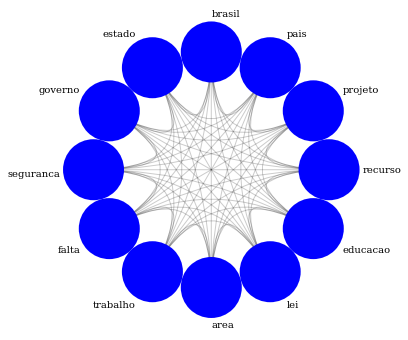

2010
['governo']
['governo', 'estado', 'projeto', 'nacional', 'brasil', 'pais', 'politica', 'casa', 'trabalho', 'grand', 'prefeito', 'jose', 'camara', 'desenvolvimento', 'exemplo']


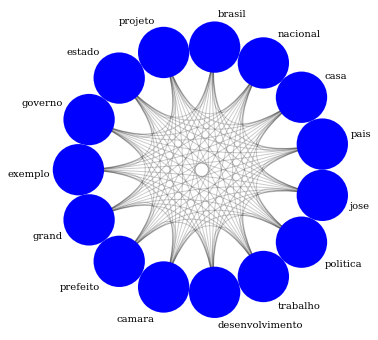

2009
['governo']
['governo', 'estado', 'federal', 'municipio', 'recurso', 'trabalho', 'saude', 'publico', 'nacional', 'casa', 'projeto', 'brasil', 'pessoas', 'servico', 'segundo', 'trabalhador']


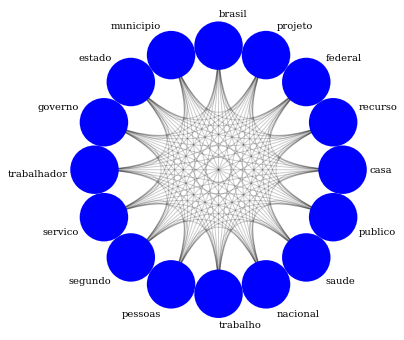

2008
['governo']
['governo', 'relacao', 'brasil', 'pais', 'recurso', 'quanto', 'politica', 'nacional', 'direito', 'rio', 'municipio', 'povo', 'brasileiro', 'proprio', 'desenvolvimento', 'federal']


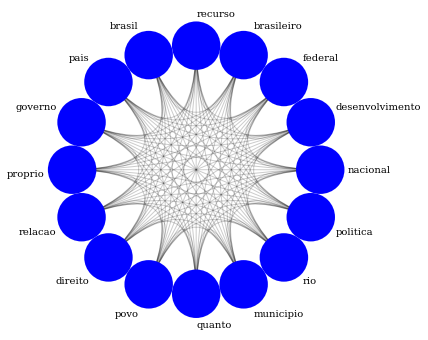

2007
['estado']
['estado', 'governo', 'bilho', 'recurso', 'municipio', 'brasil', 'projeto', 'desenvolvimento', 'federal', 'vida', 'rio', 'quanto', 'area', 'social', 'regiao', 'producao', 'populacao', 'investimento', 'programa']


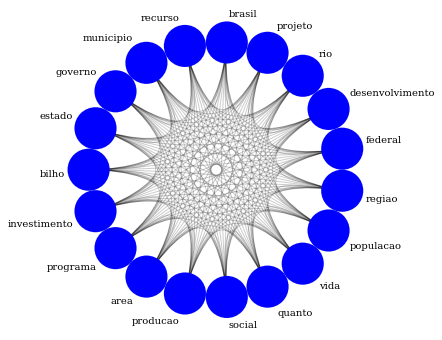

2006
['governo']
['governo', 'estado', 'brasil', 'pais', 'projeto', 'publico', 'recurso', 'nacional', 'sistema', 'politica', 'caso', 'brasileiro', 'bahia', 'trabalho', 'investimento', 'lula', 'congresso', 'principal', 'responsavel']


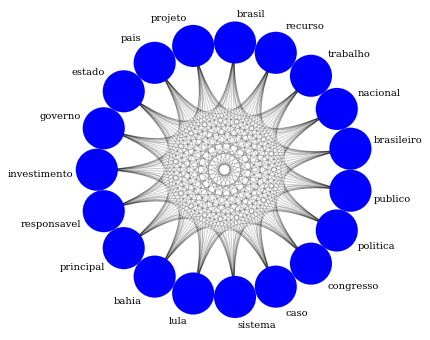

2005
['governo']
['governo', 'estado', 'projeto', 'pais', 'brasil', 'recurso', 'bilho', 'municipio', 'desenvolvimento', 'federal', 'casa', 'rio', 'lei', 'nacional', 'situacao', 'norte', 'aumento', 'investimento', 'povo', 'ministro']


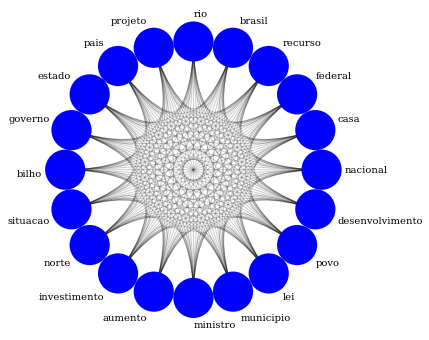

2004
['governo']
['governo', 'salario', 'pais', 'brasil', 'federal', 'politica', 'trabalho', 'projeto', 'lei', 'quanto', 'ministro', 'novo', 'aumento', 'segundo', 'recurso']


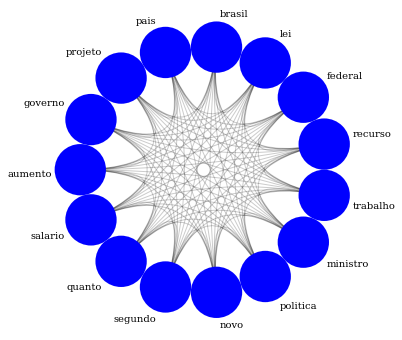

2003
['governo']
['governo', 'estado', 'populacao', 'desenvolvimento', 'municipio', 'nacional', 'social', 'recurso', 'nordeste', 'condico', 'regiao']


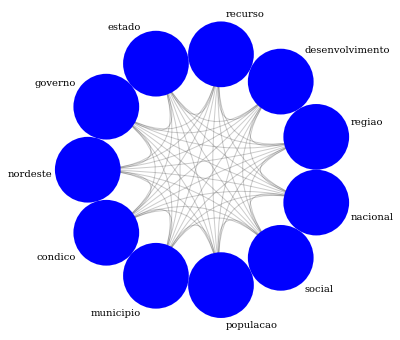

In [16]:
for year in years: 
  print(year)
  # Fit to the data
  X = vec_alphanumeric.fit_transform(years[year].query('party == "DEM" | party == "PFL"').speech)

  # Creating the graph
  G = generate_graph(vec_alphanumeric.vocabulary_)

  # Compute the degree centralities of G
  deg_cent = nx.degree_centrality(G)

  # Compute the maximum degree centrality
  max_dc = max(deg_cent.values())

  prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

  # Print the most prolific collaborator(s)
  print(prolific_collaborators)

  cliques = nx.find_cliques(G)

  largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

  print(largest_clique)

  G_lc = G.subgraph(largest_clique)

  for n in G_lc.nodes():
      G_lc.node[n]['degree centrality'] = deg_cent[n]

  # Create the CircosPlot object
  c = CircosPlot(G_lc, node_labels=True, node_grouping='degree centrality',
                node_order='degree centrality')

  # Draw the CircosPlot to the screen
  c.draw()
  plt.show()